# Computer Vision

## Face Detection

In [1]:
import cv2 #Opencv

In [5]:
image = cv2.imread("./workplace-1245776_1920.jpg")

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
detector = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

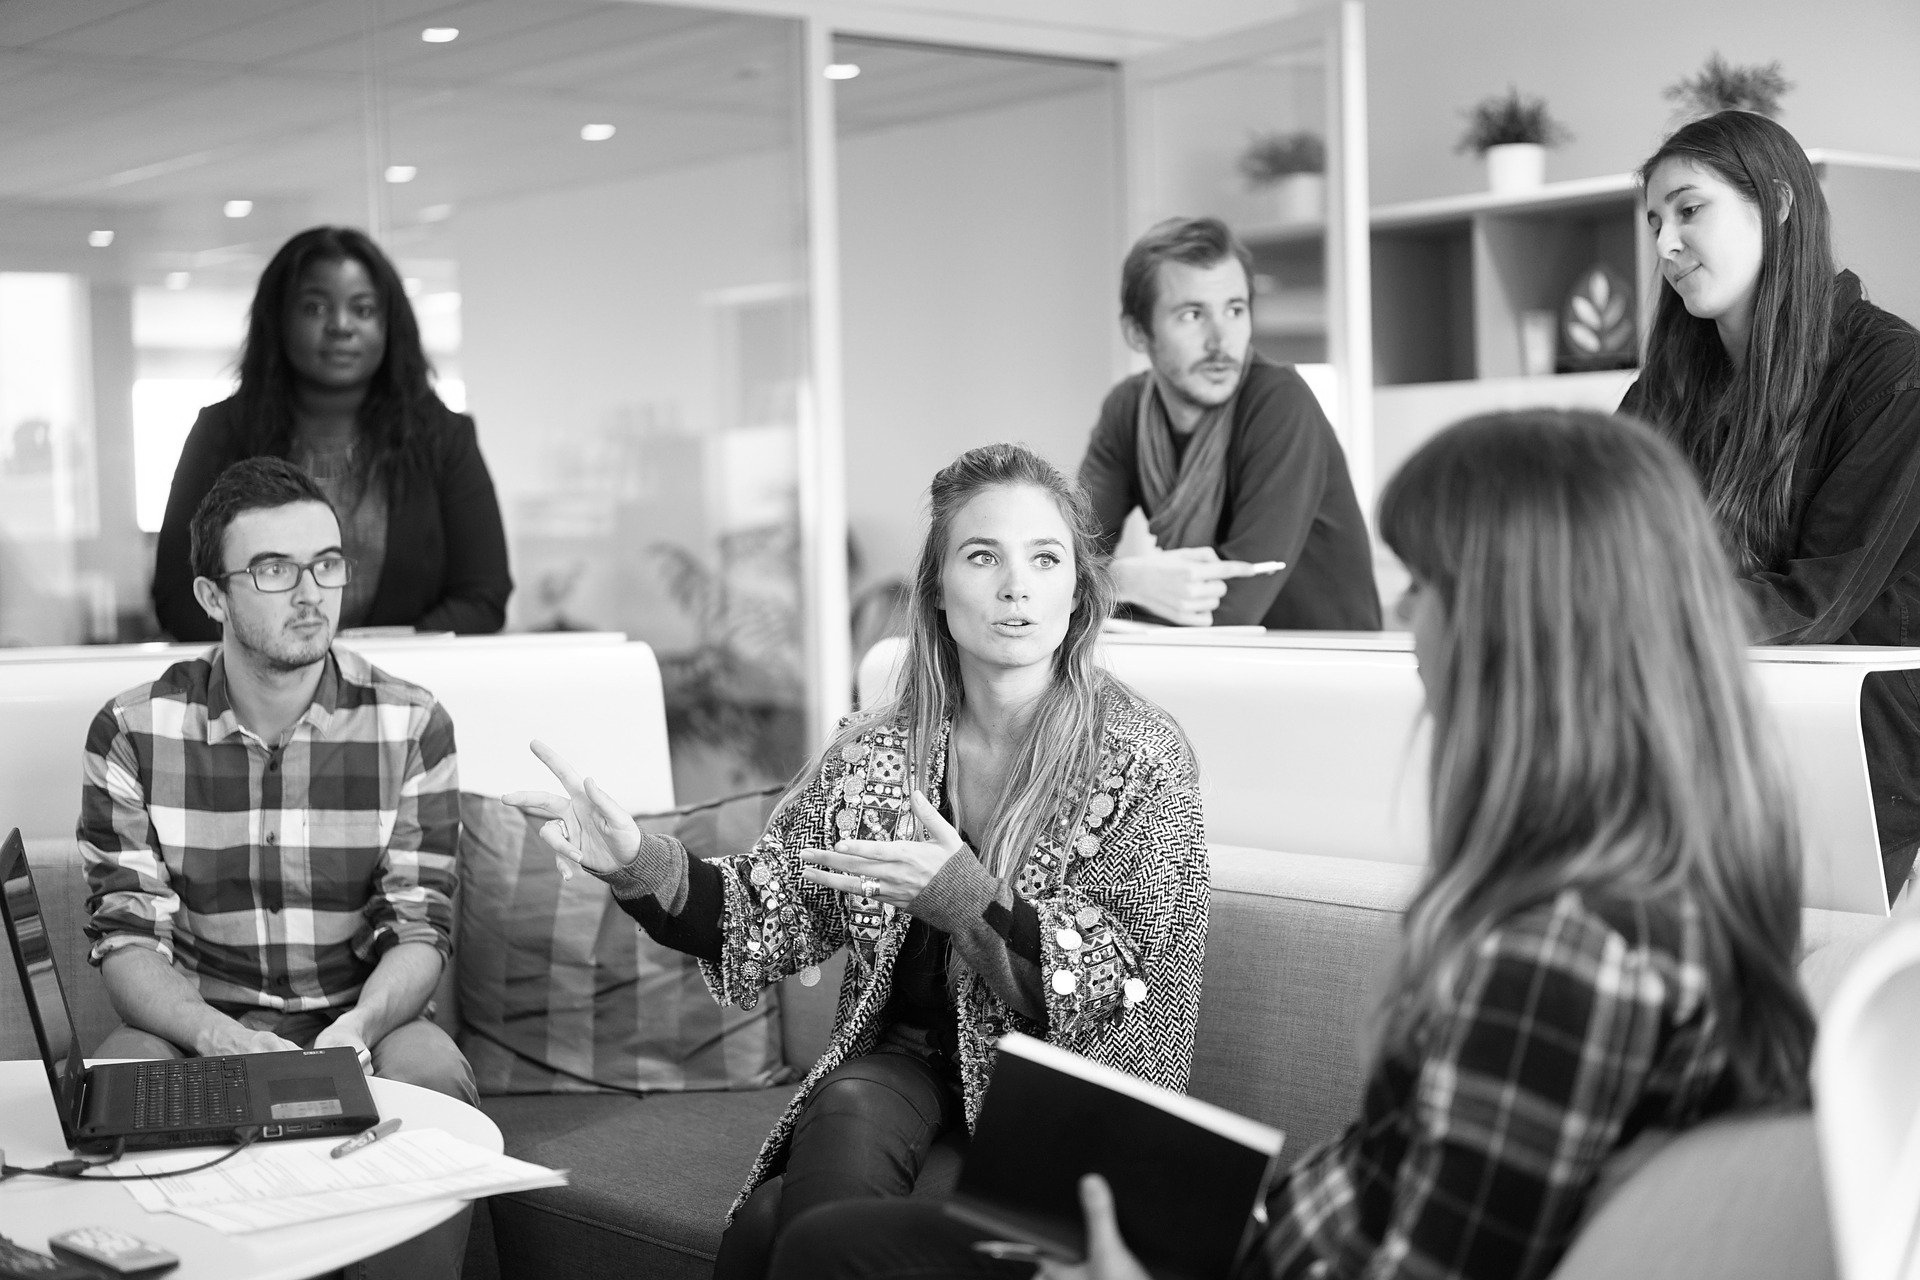

In [8]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [9]:
detections = detector.detectMultiScale(gray_image)
detections # 7 detections

array([[1639,  159,  141,  141],
       [ 284,  263,  113,  113],
       [1148,  261,  129,  129],
       [ 229,  509,  142,  142],
       [ 928,  488,  172,  172],
       [ 103,  784,   56,   56],
       [  44,  919,   30,   30]], dtype=int32)

In [10]:
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [11]:
detections = detector.detectMultiScale(gray_image, scaleFactor=1.3, minSize=(30,30))
detections

array([[1635,  156,  147,  147],
       [ 284,  262,  114,  114],
       [1149,  260,  129,  129],
       [ 928,  491,  171,  171],
       [ 222,  507,  151,  151]], dtype=int32)

In [12]:
image = cv2.imread("./workplace-1245776_1920.jpg")
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

## Body Detection

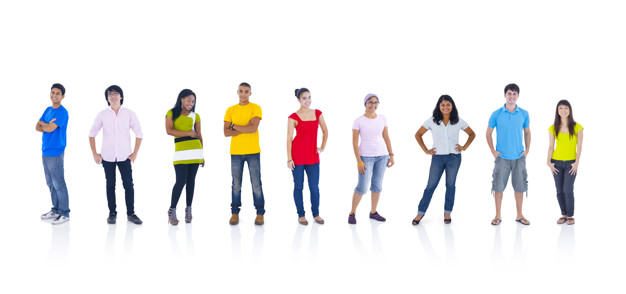

In [13]:
image = cv2.imread('./pessoas.jpg')
cv2_imshow(image)

8
[[461  60  92 184]
 [195  47  96 192]
 [266  80  75 151]
 [ 70  57  95 189]
 [532 103  66 133]
 [327  69  84 169]
 [144 100  71 142]
 [ 12  66  90 180]]


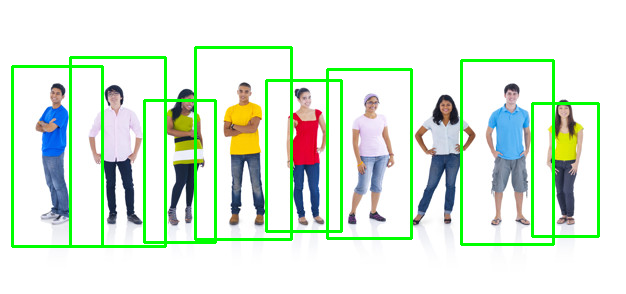

In [15]:
body_detector = cv2.CascadeClassifier('./fullbody.xml')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = body_detector.detectMultiScale(image_gray, scaleFactor=1.1, minSize=(50,50))
print(len(detections))
print(detections)
for (x, y, l, a) in detections:
  cv2.rectangle(image, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(image)

## Face Recognition

In [16]:
from PIL import Image
import numpy as np

In [17]:
import zipfile
path = './yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import os
os.listdir('./yalefaces/train')

In [39]:
def image_data():
  paths = [os.path.join('./yalefaces/train', f) for f in os.listdir('./yalefaces/train')]
  faces = []
  ids = []
  for path in paths:
    if path == './yalefaces/train/.ipynb_checkpoints':
      continue
    image = Image.open(path).convert('L') # L = black and white image
    image_np = np.array(image, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(image_np)
  return np.array(ids), faces

In [40]:
ids, faces = image_data()

In [41]:
ids[0]

7

In [42]:
faces[0]

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [58]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('LBPHclassifier.yml')

In [59]:
def testRecognizer():
  paths = [os.path.join('./yalefaces/test', f) for f in os.listdir('./yalefaces/test')]
  recognizer = cv2.face.LBPHFaceRecognizer_create()
  recognizer.read('./LBPHclassifier.yml')
  correct_count = 0
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    predicted_id, _ = recognizer.predict(image_np)
    correct_id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    correct_count += 1 if predicted_id == correct_id else 0
    cv2.putText(image_np, 'P: ' + str(predicted_id), (x, y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(image_np, 'C: ' + str(correct_id), (x, y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2_imshow(image_np)
  print("Accuracy: %.2f" % (correct_count/float(len(paths))))

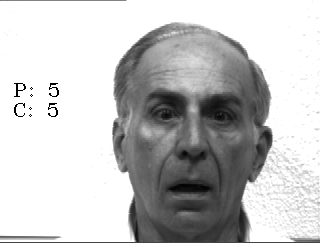

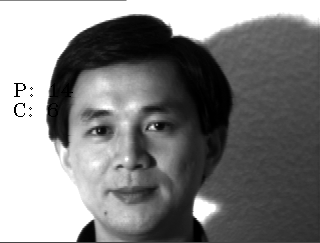

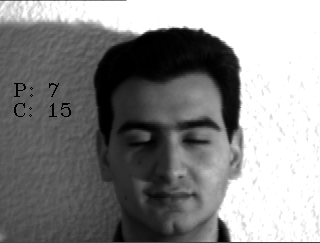

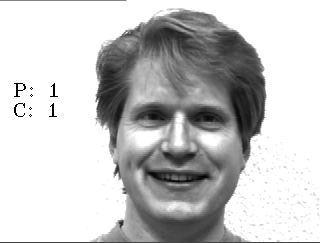

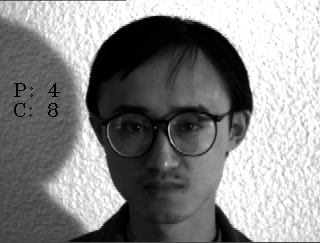

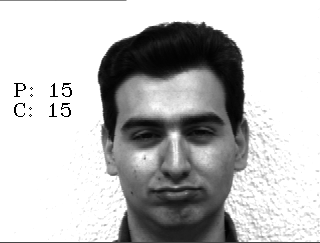

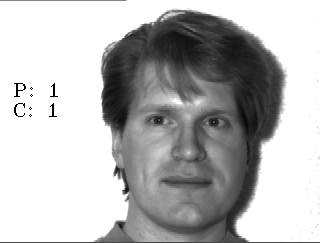

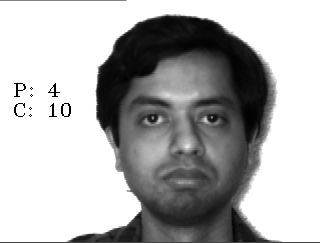

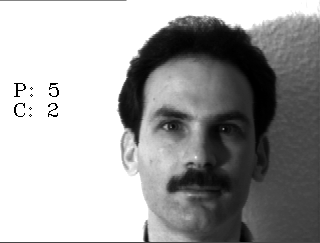

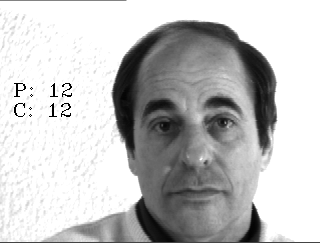

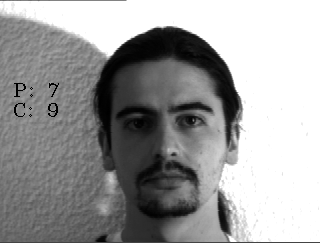

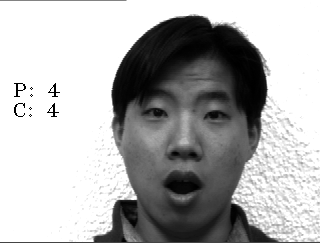

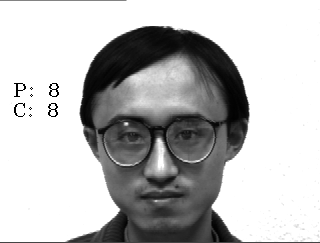

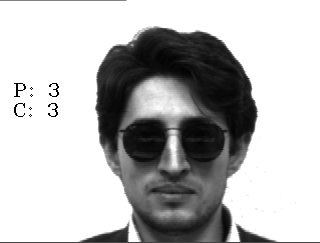

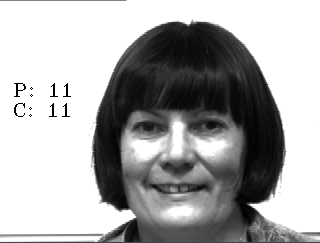

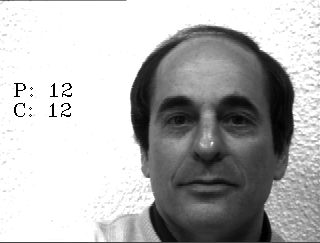

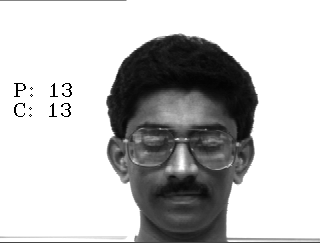

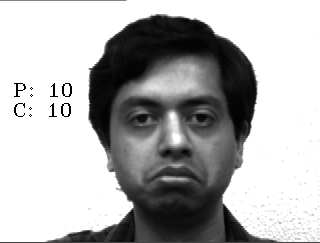

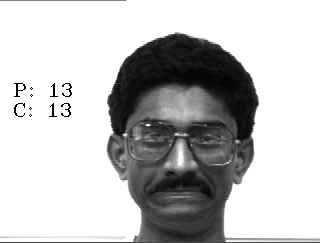

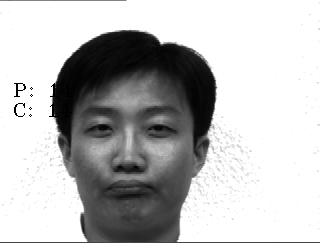

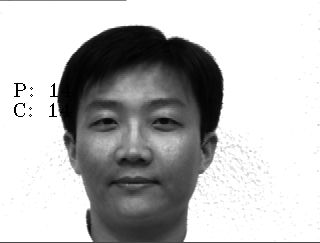

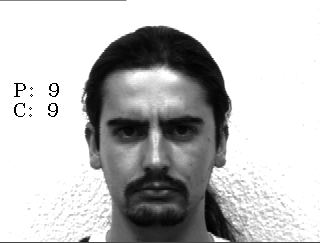

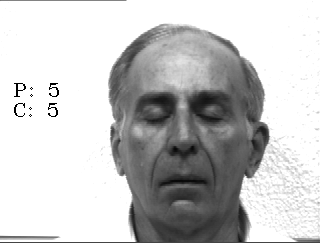

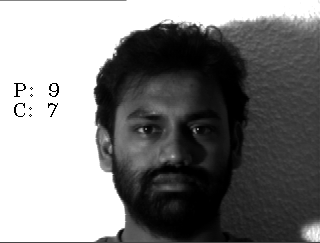

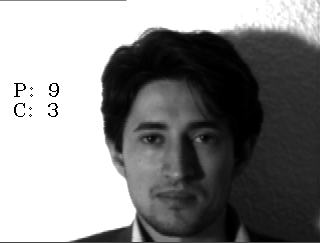

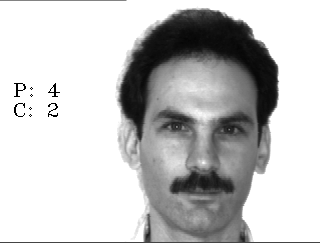

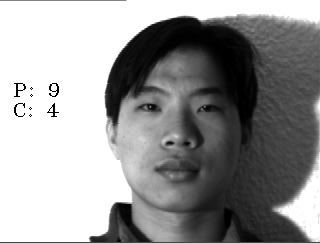

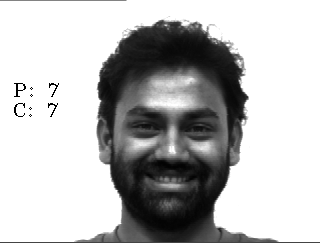

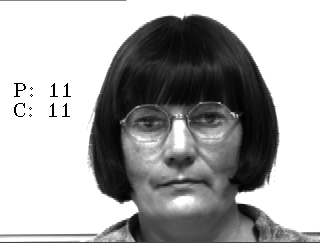

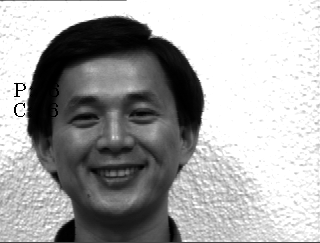

Accuracy: 0.67


In [60]:
testRecognizer()